In [1]:
# Importing all necessary Libraries

import numpy as np # numpy used for mathematical operation on array
import pandas as pd  # pandas used for data manipulation on dataframe
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings( "ignore" )

In [2]:
#reading the data set 
df=pd.read_csv("water_potability.csv",header=0)

In [3]:
df.sample()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
755,9.888941,220.638823,19892.388914,7.986456,326.07656,460.812425,14.929172,59.602808,3.750164,1


#### 1) pH value: 
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

#### 2) Hardness: 
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

#### 3) Solids (Total dissolved solids - TDS): 
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

#### 4) Chloramines: 
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

#### 5) Sulfate: 
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

#### 6) Conductivity: 
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

#### 7) Organic_carbon: 
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

#### 8) Trihalomethanes: 
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

#### 9) Turbidity: 
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

#### 10) Potability: 
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable

In [4]:
# printing the first 5 rows of the dataset
df.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
# printing the last 5 rows of the dataset
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [6]:
#checking the shape (number of rows and columns) of the dataset
df.shape

(3276, 10)

In [7]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

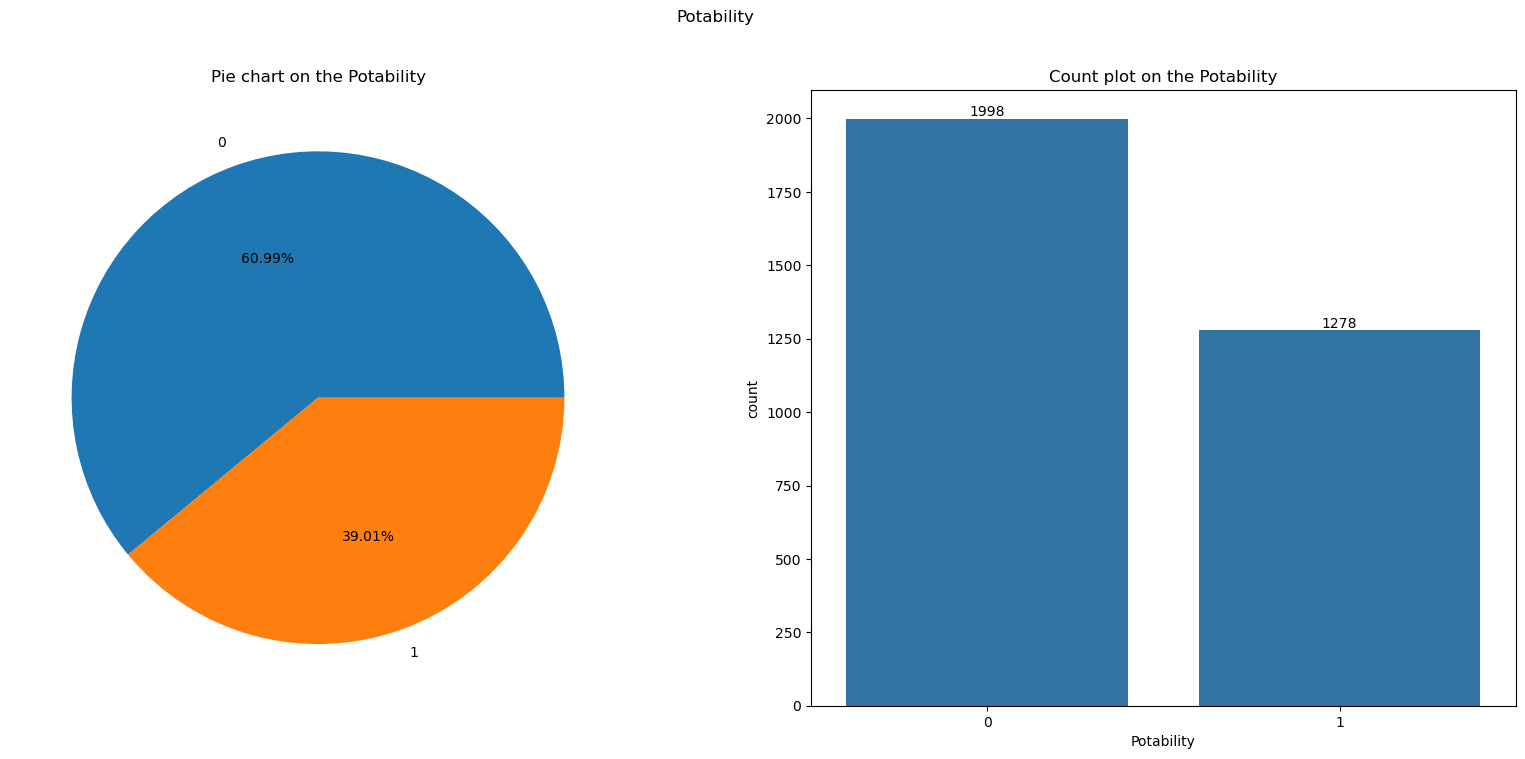

In [8]:
# Distribution Analysis of dependent variable
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.pie(df['Potability'].value_counts(), labels=df['Potability'].value_counts().index, autopct='%.2f%%')
plt.title('Pie chart on the Potability')
plt.subplot(122)
ax = sns.countplot(data=df, x = 'Potability')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Count plot on the Potability')
plt.suptitle('Potability')
plt.show()

<Axes: >

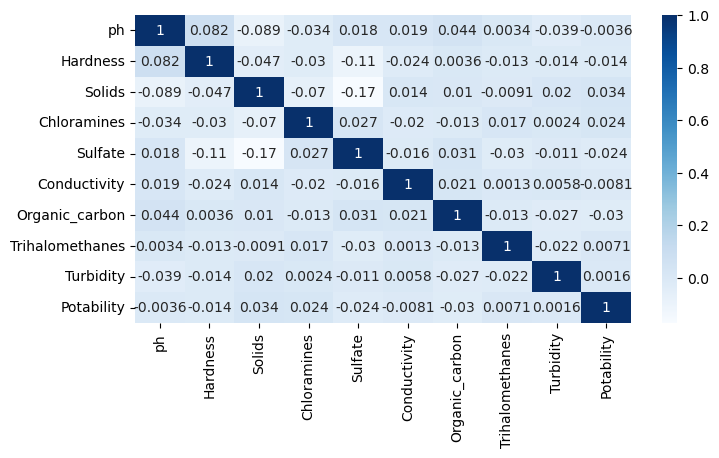

In [9]:
#correlartion
corrmat = df.corr()
f, ax = plt.subplots(figsize =(8,4))
sns.heatmap(corrmat, ax = ax, annot=True,cmap ="Blues")# corelation heatmap

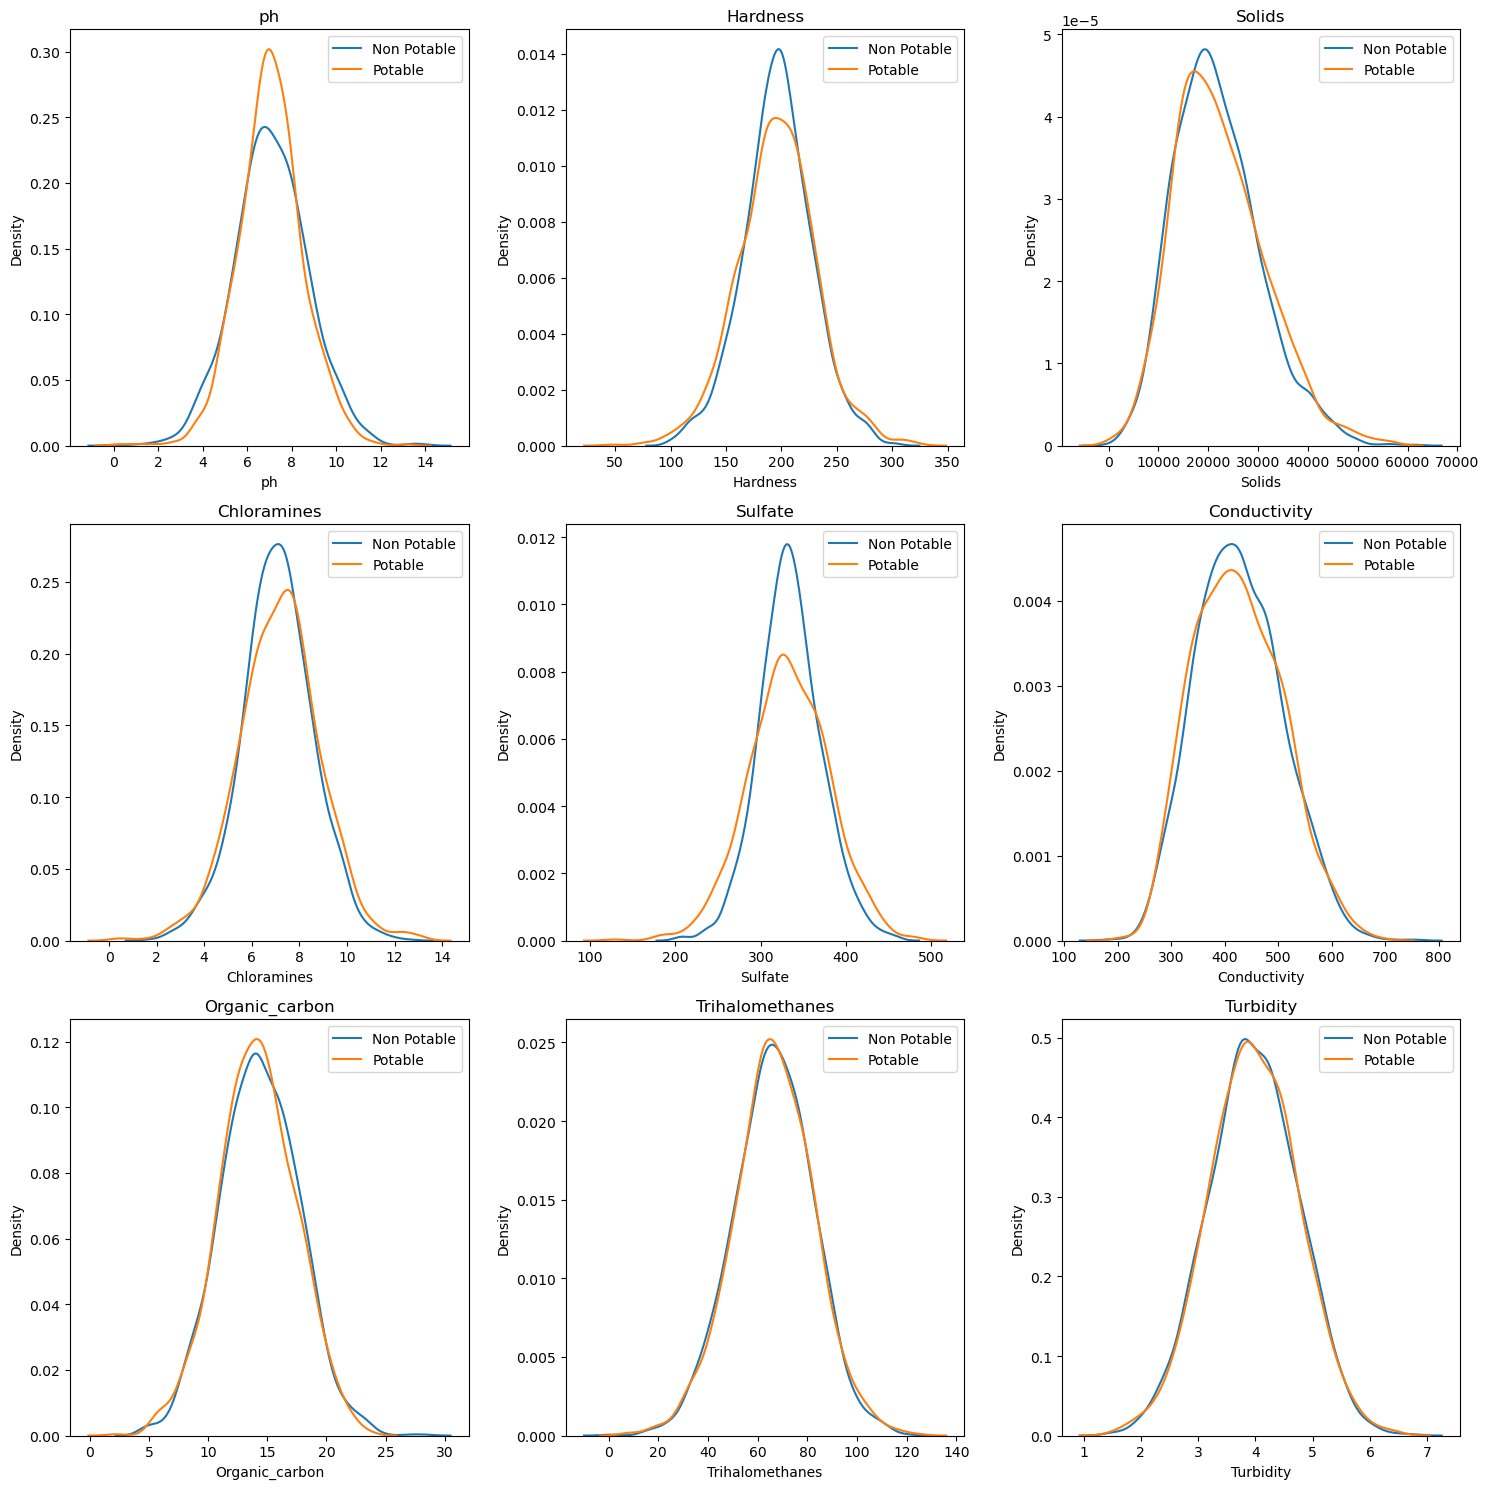

In [10]:
non_potable = df.query("Potability == 0")
potable = df.query("Potability == 1")

plt.figure(figsize = (15,15))
for ax, col in enumerate(df.columns[:9]): #select just first 9 columns (last one is Potability)
    plt.subplot(3,3, ax + 1)
    plt.title(col)
    sns.kdeplot(x = non_potable[col], label = "Non Potable")
    sns.kdeplot(x = potable[col], label = "Potable")
    plt.legend() #making labels visible
plt.tight_layout()


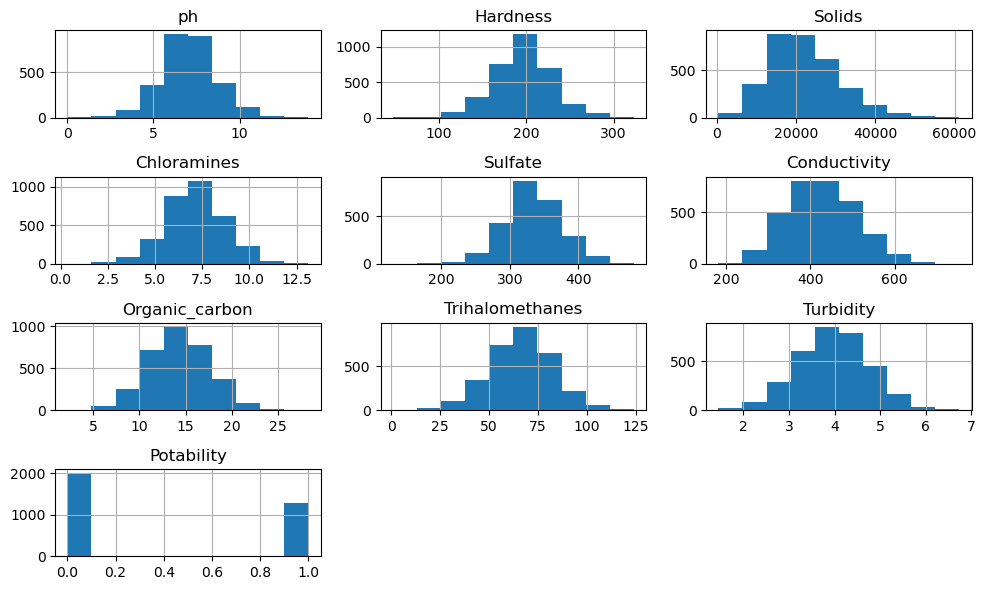

In [11]:
# Plot histograms for each column
df.hist(bins=10, figsize=(10, 6))
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [12]:
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [13]:
#checking the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [14]:
# Statistical measure of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [15]:
# checking the duplicate values
df.duplicated().sum()

0

In [16]:
#checking the missing values in the dataset
df.isnull()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3271,False,False,False,False,False,False,False,False,False,False
3272,False,False,False,False,True,False,False,True,False,False
3273,False,False,False,False,True,False,False,False,False,False
3274,False,False,False,False,True,False,False,False,False,False


In [17]:
#checking the null values in each column 
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<Axes: >

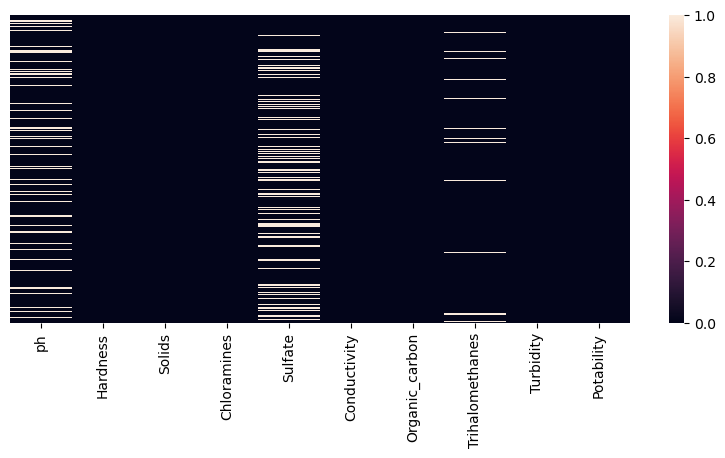

In [18]:
# Plotting a heat map to check null values in each column
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(),yticklabels= False)

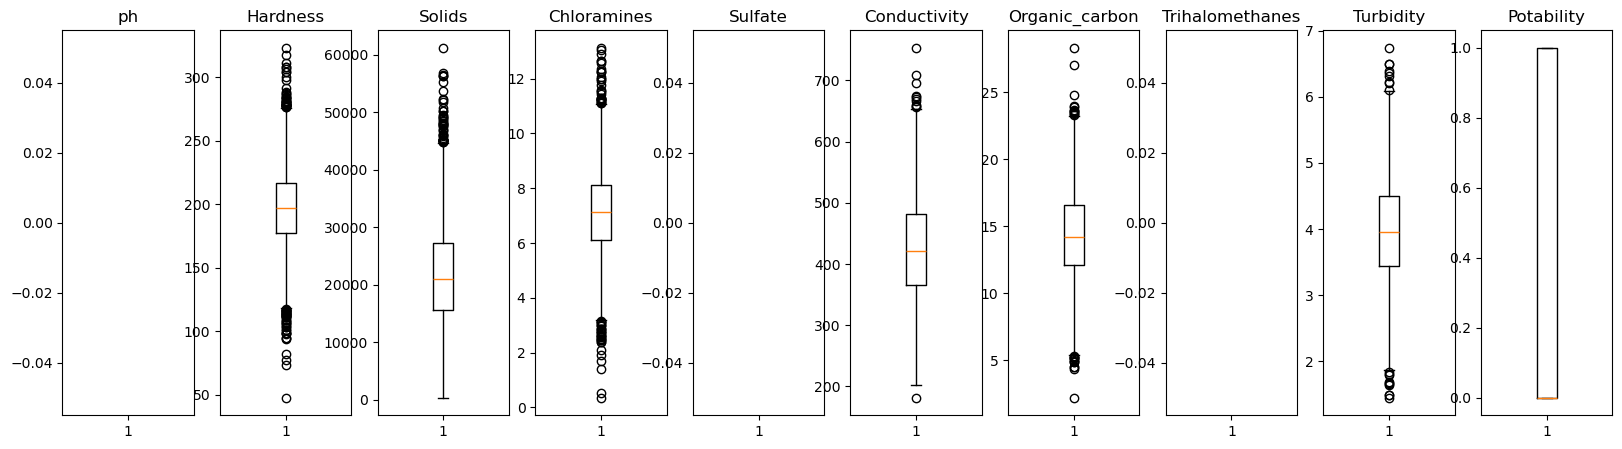

In [19]:
# Create a boxplot for each numerical column
fig, axes = plt.subplots(nrows=1, ncols=df.shape[1], figsize=(20, 5))
for i, column in enumerate(df.columns):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)

plt.show()


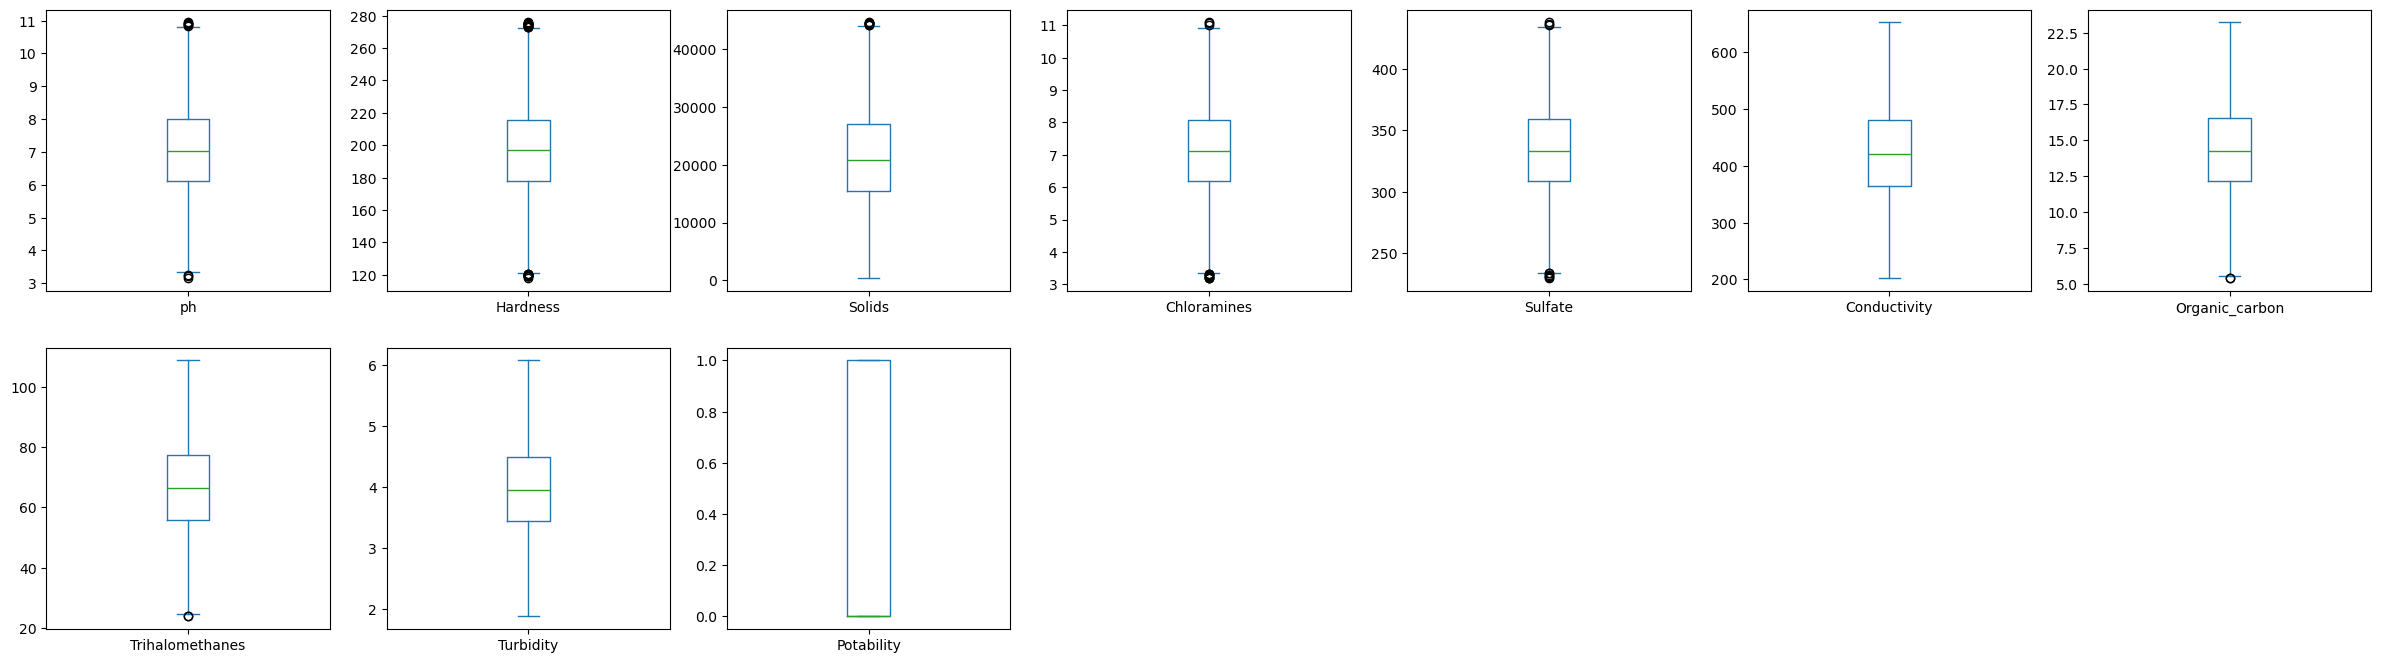

In [20]:
# outlier treatment for required columns

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

new_data = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
new_data.plot(kind='box',subplots=True,layout=(7,7),figsize=(30,30))
plt.show()

In [21]:
# Columns for which missing values need to be replaced by median
columns_to_fill = ['ph', 'Sulfate', 'Trihalomethanes']

# Replace missing values with median
for col in columns_to_fill:
    median_val = new_data[col].median()
    new_data[col].fillna(median_val, inplace=True)

print(new_data.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


### Sampling Method

In [22]:
# separate minority and majority classes
not_Potabile = new_data[new_data.Potability==0]
Potabile = new_data[new_data.Potability==1]

In [23]:
from sklearn.utils import resample

In [24]:
# upsample minority
Potabile_upsampled = resample(Potabile,replace=True,n_samples=len(not_Potabile),random_state=27)

In [25]:
# combine majority and upsampled minority
new_data = pd.concat([not_Potabile, Potabile_upsampled])

# check new class counts
new_data.Potability.value_counts()

Potability
0    1824
1    1824
Name: count, dtype: int64

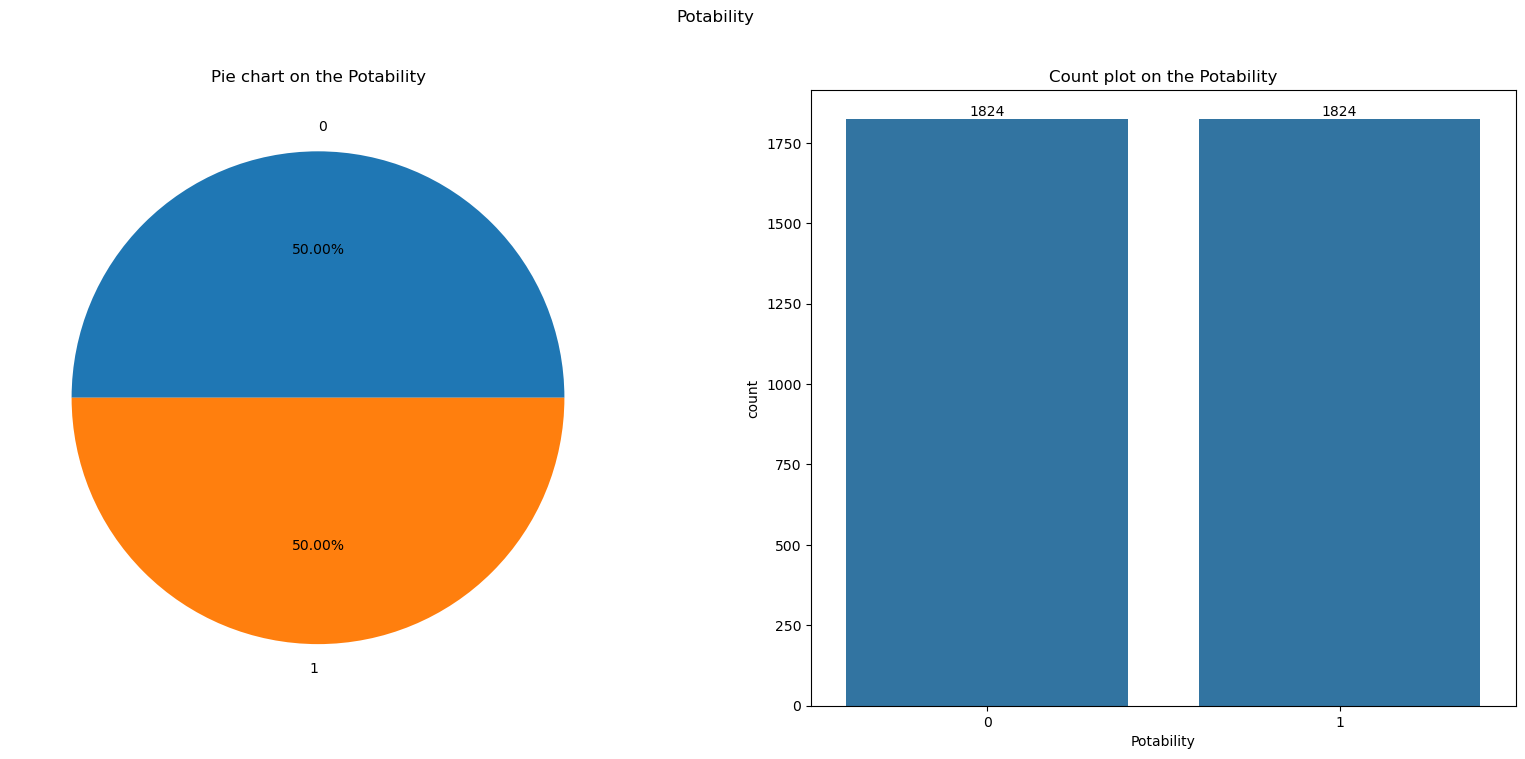

In [26]:
# Distribution Analysis of dependent variable after sampling
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.pie(new_data['Potability'].value_counts(), labels=new_data['Potability'].value_counts().index, autopct='%.2f%%')
plt.title('Pie chart on the Potability')
plt.subplot(122)
ax = sns.countplot(data=new_data, x = 'Potability')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Count plot on the Potability')
plt.suptitle('Potability')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = new_data.columns[:-1]
new_data[columns_to_scale] = standardScaler.fit_transform(new_data[columns_to_scale])


In [28]:
new_data.sample()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
776,-0.017048,-1.331336,0.809152,0.868812,1.69727,-0.046121,1.414416,-0.920374,1.273568,1


### Input-Output split

In [29]:
# Input - output split
x = new_data.drop("Potability",axis=1)
y = new_data["Potability"]

In [30]:
x.shape

(3648, 9)

In [31]:
y.shape

(3648,)

In [32]:
# Train-test split
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=5)

## *********************************************** Model Building*****************************************

###  Logistic Regression

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming X contains features and y contains labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model1 = LogisticRegression()

# Train the model on the training data
model1.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model1.predict(X_test)

# Evaluate the model
LR_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", LR_accuracy)

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.510958904109589
              precision    recall  f1-score   support

           0       0.56      0.40      0.47       390
           1       0.48      0.64      0.55       340

    accuracy                           0.51       730
   macro avg       0.52      0.52      0.51       730
weighted avg       0.52      0.51      0.50       730



### Decision Tree

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming X contains features and y contains labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
model2 = DecisionTreeClassifier()

# Train the model on the training data
model2.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model2.predict(X_test)

# Evaluate the model
DT_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", DT_accuracy)

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.7657534246575343
              precision    recall  f1-score   support

           0       0.86      0.67      0.75       390
           1       0.70      0.87      0.78       340

    accuracy                           0.77       730
   macro avg       0.78      0.77      0.77       730
weighted avg       0.78      0.77      0.76       730



### Random Forest tree

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=50)

# Create a Random Forest classifier
model3 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model3.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model3.predict(X_test)

# Evaluate the model
RF_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", RF_accuracy)

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.8234649122807017
              precision    recall  f1-score   support

           0       0.78      0.87      0.83       436
           1       0.87      0.78      0.82       476

    accuracy                           0.82       912
   macro avg       0.83      0.83      0.82       912
weighted avg       0.83      0.82      0.82       912



In [36]:
new_data.sample(3)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
480,0.612410,0.475427,-0.899561,-0.352321,-0.044686,-0.269439,-0.446962,0.491968,1.095972,0
823,-0.208164,0.555570,-1.081680,0.198249,-0.044686,-1.204864,-1.083549,1.506649,1.412362,0
2785,1.192221,-0.305028,-0.976013,-0.577817,-2.363551,-0.401739,-0.602107,-0.886852,-1.168813,1


In [37]:
# Checking the result using Random Forest Classifier model(as it has highest accuracy)

In [38]:
input_data = (1.524512,0.253474,0.131972,-0.804939,-0.388512,0.882979,1.284713,0.641896,0.124185)
# changing the input_data into numpy_array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model1.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print("Water is not potabile")
else:
    print("Water is not potabile")

[0]
Water is not potabile


In [39]:
# creating a pickle file
import pickle
filename = "LR_model.sav" #saving the trained model
pickle.dump(model1, open(filename, 'wb')) # wb = write binary

In [40]:
# loading the saved model
loaded_model = pickle.load(open('LR_model.sav', 'rb'))

In [41]:
x.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
dtype: object

In [42]:
input_data = (1.524512,0.253474,0.131972,-0.804939,-0.388512,0.882979,1.284713,0.641896,0.124185)
# changing the input_data into numpy_array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print("Water is not potabile")
else:
    print("Water is not potabile")

[0]
Water is not potabile
